In [10]:
import pandas as pd
df = pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [11]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
df = df.drop(columns="Serial No.")

In [13]:
x = df.drop(columns="Chance of Admit")
y = df["Chance of Admit"]

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(x , y , random_state=22 , test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [16]:
y_predict = model.predict(x_test)
print(model.score(x_train,y_train))
model.score(x_test,y_test)

1.0


0.4785651037729737

In [17]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeRegressor(),params , cv =5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [19]:
best_model = grid_search.best_estimator_
print(best_model.score(x_train,y_train))
best_model.score(x_test, y_test)

0.8275260340651396


0.6846516673362737

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

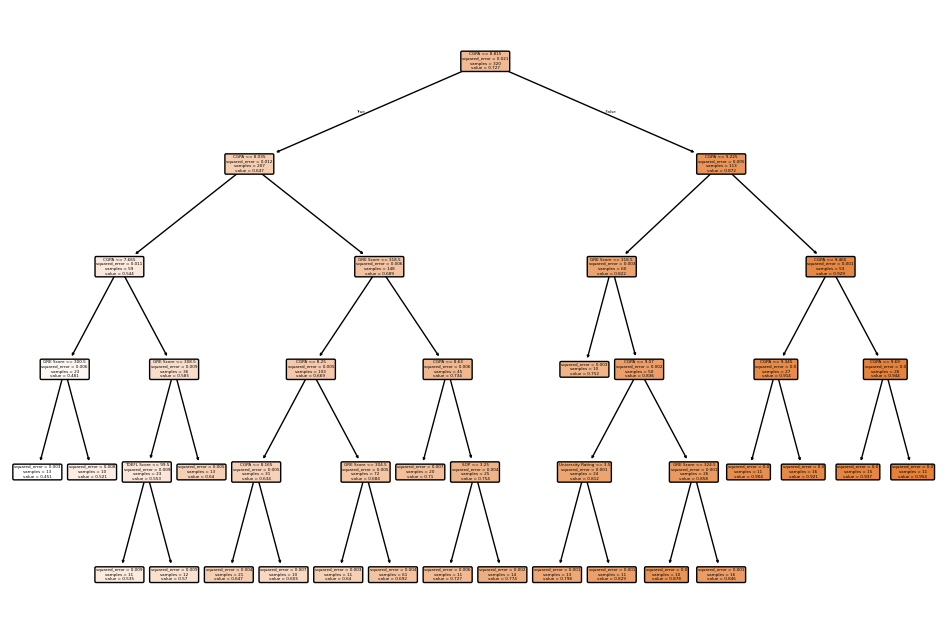

In [32]:
plt.figure(figsize=(12,8))
plot_tree(best_model, filled=True, feature_names=df.columns, class_names=df["Chance of Admit"], rounded=True)
plt.show()

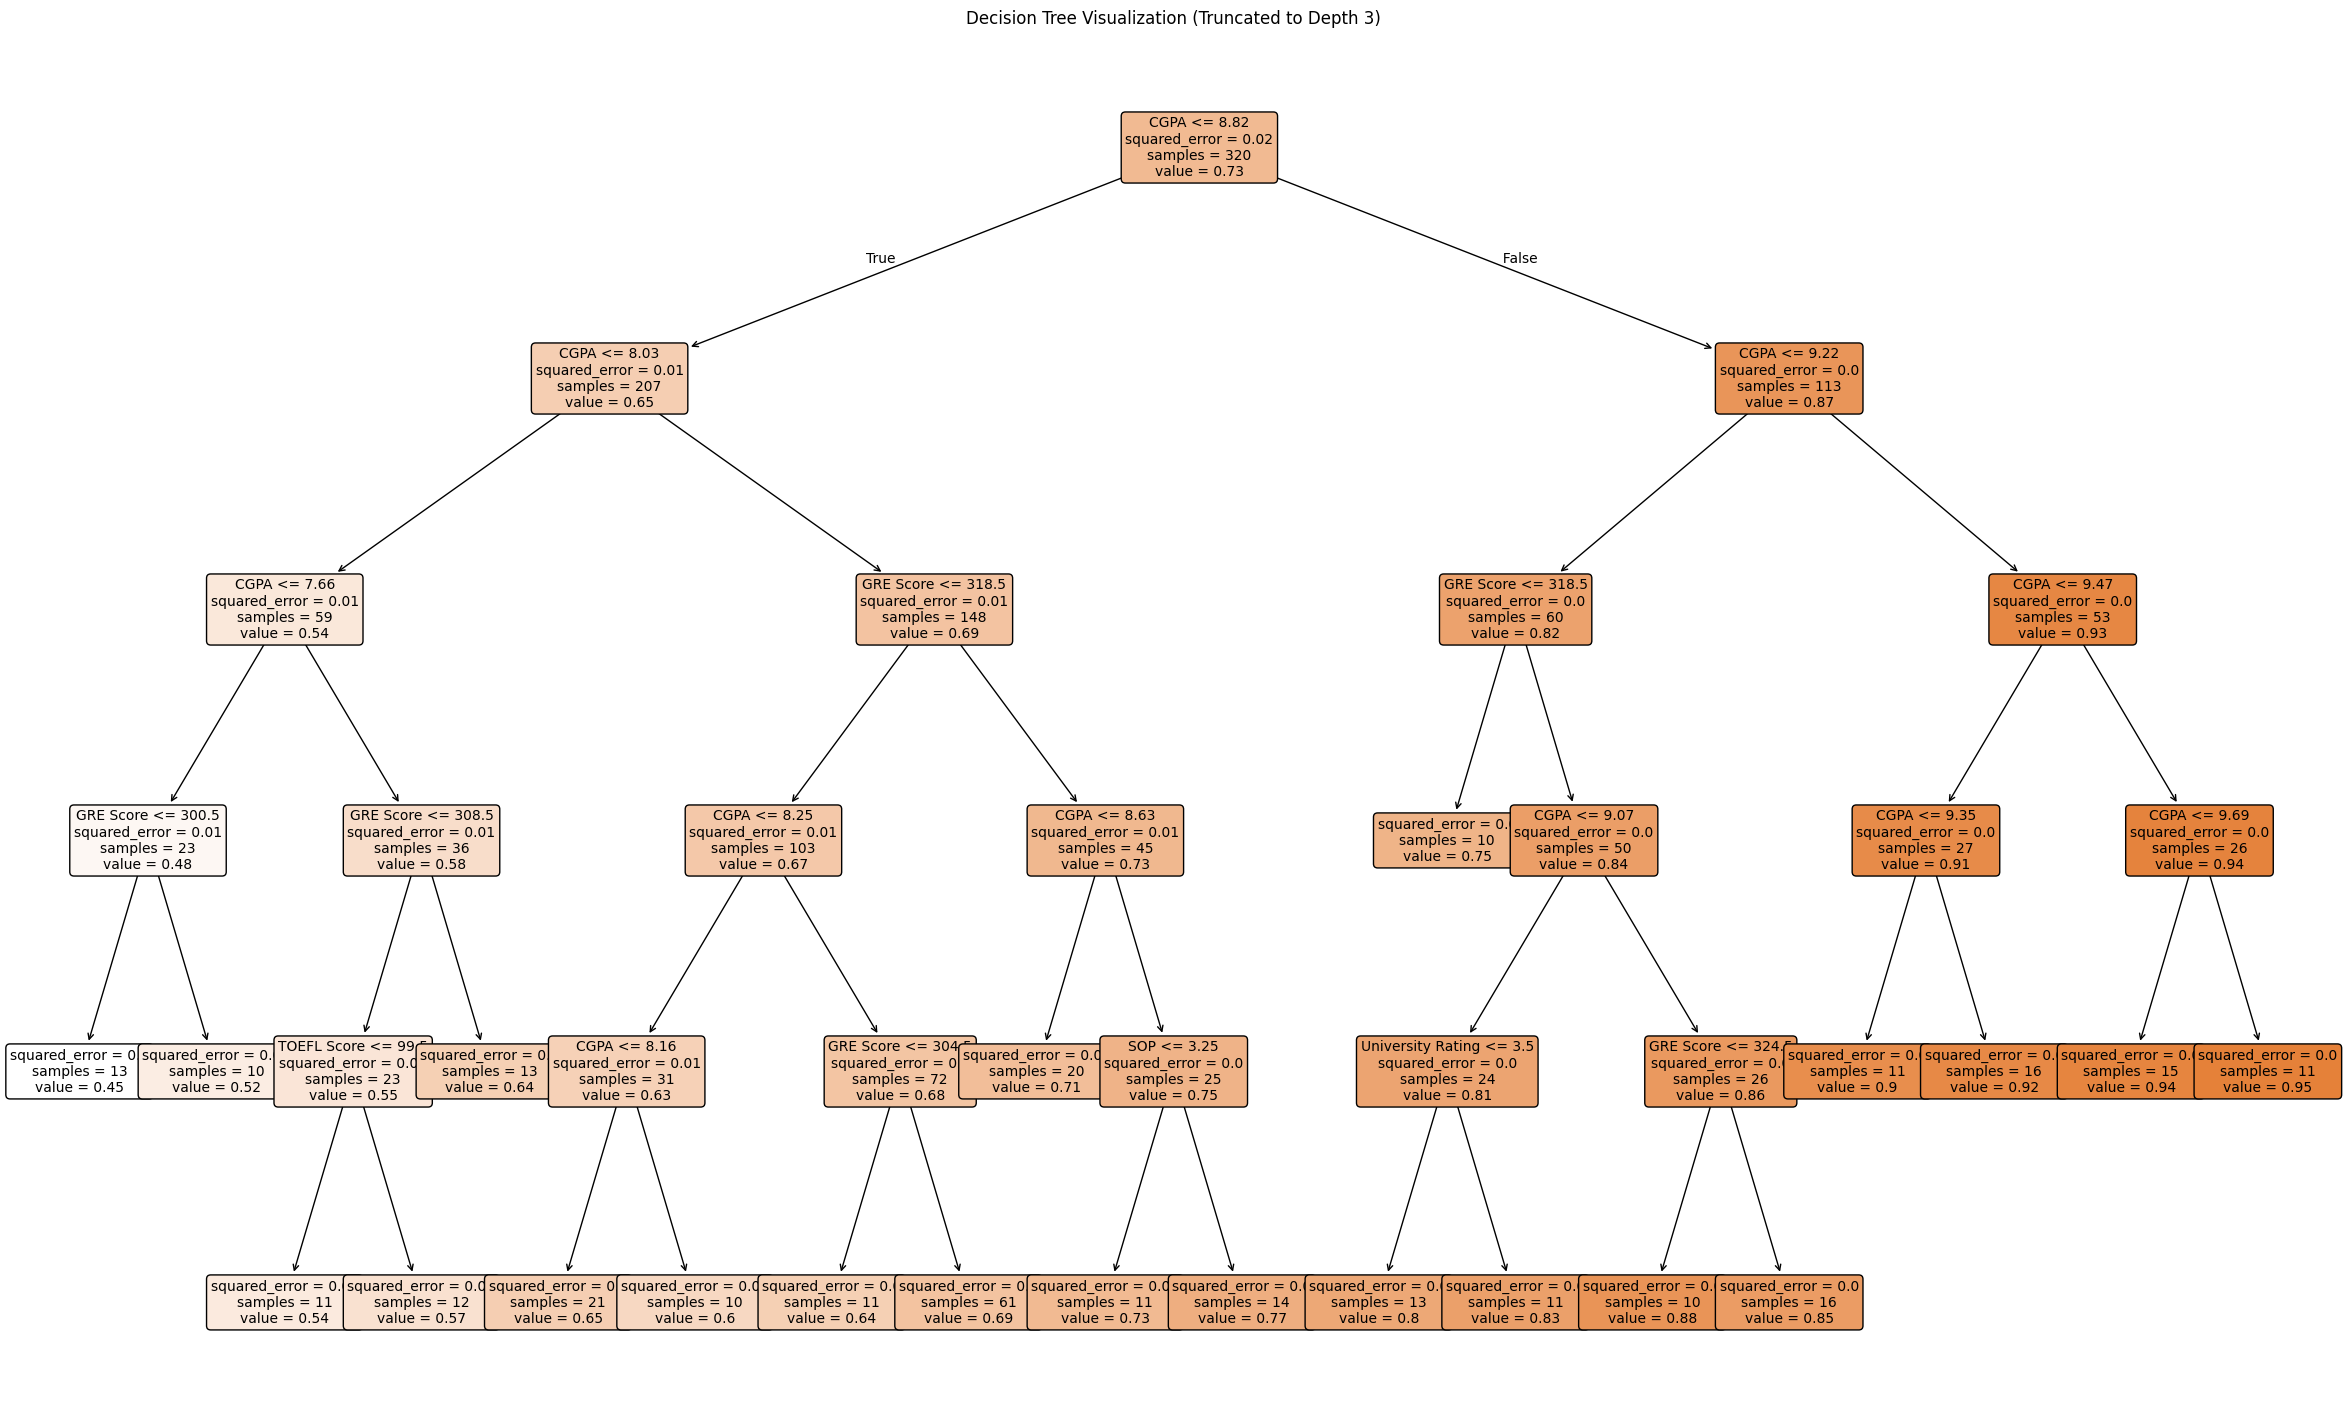

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 18)) 

plot_tree(best_model, 
          filled=True, 
          feature_names=x_train.columns, # استخدم أعمدة التدريب مش الـ df كامل
          class_names=['No Admit', 'Admit'], # لازم تكون أسماء فئات (Strings) مش العمود نفسه
          rounded=True, 
          fontsize=10,      # تصغير الخط شوية عشان المربعات
          max_depth=5,      # أهم خطوة عشان الرسمة تكون مقروءة
          precision=2)      # تقليل الأرقام العشرية لـ 2 فقط

plt.title("Decision Tree Visualization (Truncated to Depth 3)")
plt.show()